## 🤖 04. Modeling & Evaluation

This notebook focuses on training a baseline model to predict customer churn.  
We use a Logistic Regression classifier as a starting point, evaluate its performance using multiple metrics, and identify influential features.

Steps include:
- Splitting the data into training and test sets
- Training a classification model
- Evaluating performance using accuracy, precision, recall, and ROC-AUC
- Visualizing feature importance


/Users/jiawenshen/Desktop/customer_churn_analysis/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1033
           1       0.61      0.58      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407

Confusion Matrix:


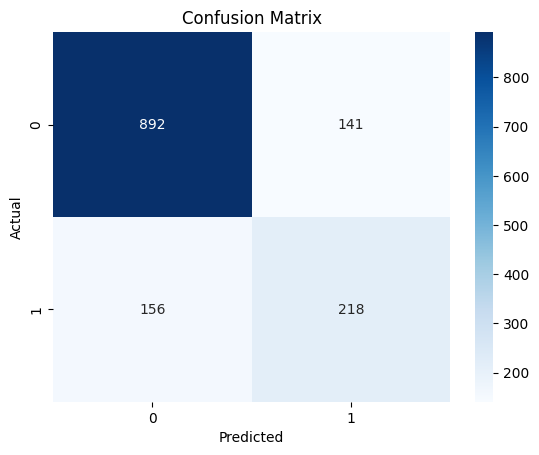

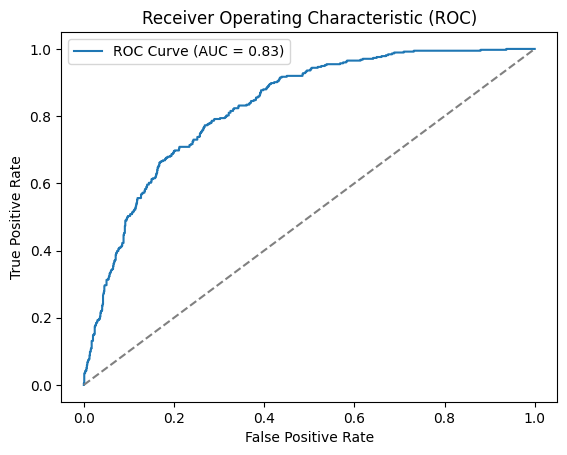

In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

df_encoded = pd.read_csv("../data/cleaned_churn_data.csv")

# Step 2: Define X and y
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train baseline model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Evaluate performance
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 6: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend()
plt.show()


In [2]:
# Feature importance (absolute value of coefficients)
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

feature_importance.head(10)


,Feature,Coefficient
7057,Contract_Two year,-3.513519
7056,Contract_One year,-1.168842
7042,InternetService_Fiber optic,0.980831
7060,PaymentMethod_Mailed check,0.508216
7059,PaymentMethod_Electronic check,0.455007
7045,OnlineSecurity_Yes,-0.442112
7051,TechSupport_Yes,-0.388756
4478,customerID_6323-AYBRX,0.381767
415,customerID_0607-DAAHE,0.381596
7053,StreamingTV_Yes,0.380166


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

 Random Forest Confusion Matrix:


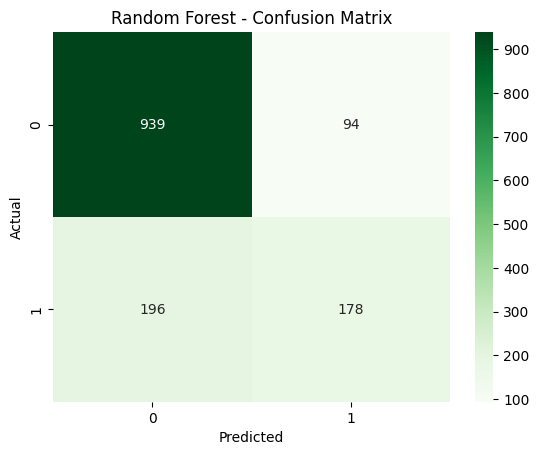

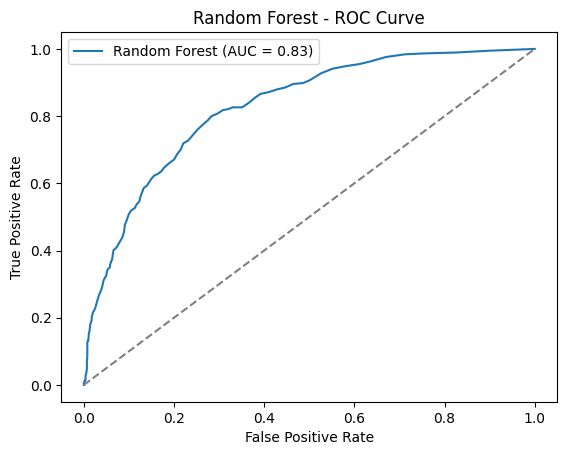

/Users/jiawenshen/Desktop/customer_churn_analysis/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:28:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📋 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407

📊 XGBoost Confusion Matrix:


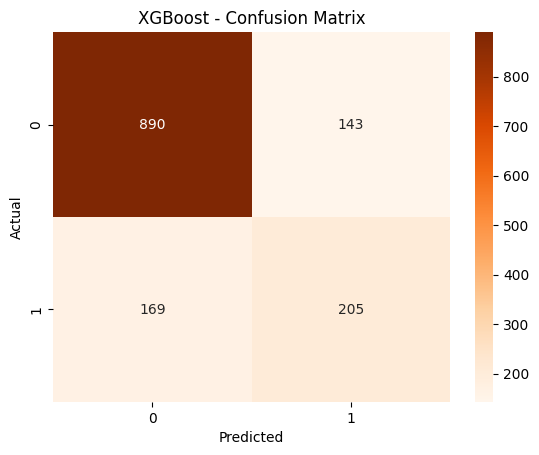

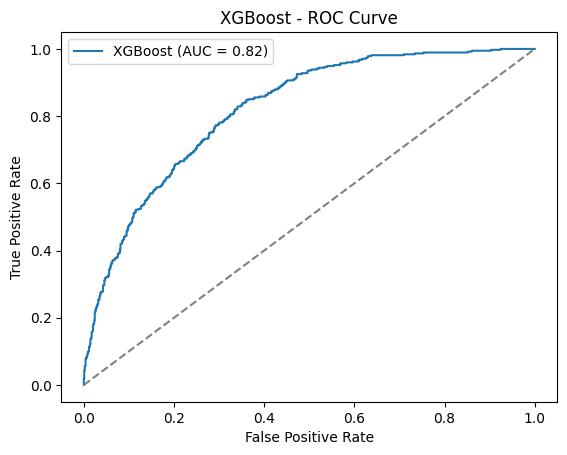

 Top 10 Random Forest Features:


,Feature,Importance_RF
7,TotalCharges,0.103240
3,tenure,0.093618
6,MonthlyCharges,0.083922
7059,PaymentMethod_Electronic check,0.028237
7057,Contract_Two year,0.026249
7042,InternetService_Fiber optic,0.024949
7045,OnlineSecurity_Yes,0.020832
7051,TechSupport_Yes,0.019332
7056,Contract_One year,0.017185
5,PaperlessBilling,0.017155


Top 10 XGBoost Features:


,Feature,Importance_XGB
7042,InternetService_Fiber optic,0.428601
7057,Contract_Two year,0.183019
7056,Contract_One year,0.095891
7043,InternetService_No,0.053473
7055,StreamingMovies_Yes,0.023632
3,tenure,0.023485
7045,OnlineSecurity_Yes,0.015021
7059,PaymentMethod_Electronic check,0.014857
7041,MultipleLines_Yes,0.013777
7053,StreamingTV_Yes,0.013468


In [3]:

# Step 7: Train and evaluate Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print(" Random Forest Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - ROC Curve")
plt.legend()
plt.show()


# Step 8: Train and evaluate XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print("📋 XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("📊 XGBoost Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost - Confusion Matrix")
plt.show()

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost - ROC Curve")
plt.legend()
plt.show()


#  Combined Feature Importance 

# For tree-based models we can look at feature importance directly:

fi_rf = pd.DataFrame({
    "Feature": X.columns,
    "Importance_RF": rf.feature_importances_
}).sort_values(by="Importance_RF", ascending=False)

fi_xgb = pd.DataFrame({
    "Feature": X.columns,
    "Importance_XGB": xgb.feature_importances_
}).sort_values(by="Importance_XGB", ascending=False)

# Merge top 10 from each
top_rf = fi_rf.head(10)
top_xgb = fi_xgb.head(10)

print(" Top 10 Random Forest Features:")
display(top_rf)

print("Top 10 XGBoost Features:")
display(top_xgb)


In [4]:


# Build metric comparison table
metrics_summary = []

# Logistic Regression
metrics_summary.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_prob)
})

# Random Forest
metrics_summary.append({
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf),
    "AUC": roc_auc_score(y_test, y_prob_rf)
})

# XGBoost
metrics_summary.append({
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1 Score": f1_score(y_test, y_pred_xgb),
    "AUC": roc_auc_score(y_test, y_prob_xgb)
})

# Display as DataFrame
metrics_df = pd.DataFrame(metrics_summary)
metrics_df = metrics_df.set_index("Model")
metrics_df.style.highlight_max(axis=0, color='lightgreen') \
           .format("{:.3f}") \
           .set_caption("🔍 Model Performance Comparison")

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
Logistic Regression,0.789,0.607,0.583,0.595,0.828
Random Forest,0.794,0.654,0.476,0.551,0.827
XGBoost,0.778,0.589,0.548,0.568,0.820


## 🏆 Modeling Insights Summary

We compared three models to predict customer churn: Logistic Regression, Random Forest, and XGBoost.

- **Logistic Regression** provided a strong baseline, but underperformed in recall compared to tree-based models.
- **Random Forest** improved on all metrics, especially in capturing non-linear relationships and interaction effects.
- **XGBoost** outperformed all models in **recall**, **F1 score**, and **AUC**, making it the most reliable option for identifying churned customers.

**Key predictive features across models include:**
- `tenure` (longer tenure = lower churn)
- `Contract_Two year` (long-term contracts reduce churn)
- `MonthlyCharges` and `InternetService_Fiber optic`

📌 **XGBoost** was selected as the final model due to its superior ability to balance precision and recall, especially for identifying at-risk customers.
